# Item-Based Collaborative Filtering

In [23]:
import pandas as pd
from surprise.model_selection import train_test_split
import matplotlib.pyplot as plt
import pickle

# Setting the seed for reprodcuibility

In [24]:
# we set a random seed here to make the results in this notebook reproducible
import random
import numpy as np

my_seed = 0
random.seed(my_seed)
np.random.seed(my_seed)

# Reading data

In [25]:
df = pd.read_csv('../data/reviews_stratified_sampled.csv')
df

,beer_id,username,date,text,look,smell,taste,feel,overall,score,sentiment,has_look,has_smell,has_taste,has_feel,mentioned_aspects
0,1428,Aethien,2012-02-12,"poured into a tulip, it looks a nice golden ye...",3.00,1.5,1.5,2.0,2.0,1.74,negative,True,True,True,True,"look, smell, taste, feel"
1,4351,kojevergas,2011-07-31,can served into norrebro bryghus stemware in c...,2.50,2.0,2.0,1.5,2.0,1.98,negative,True,True,True,True,"look, smell, taste, feel"
2,70485,CMUbrew,2012-03-10,reviewed from notes 500ml can poured into a pl...,3.00,1.0,1.0,1.5,1.0,1.17,negative,True,True,True,True,"look, smell, taste, feel"
3,27069,maximum12,2010-05-12,rec'd a bottle of this unbidden in a recent tr...,2.50,2.0,2.0,2.0,1.0,1.83,negative,True,True,True,True,"look, smell, taste, feel"
4,44788,HarleyRider,2010-06-26,heading out on the boat my wife brings home a ...,3.00,1.0,1.0,3.0,2.0,1.52,negative,True,True,True,True,"look, smell, taste, feel"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27697,90141,BlackBelt5112203,2013-07-26,5 oz pour into a tasting glass on tap at the w...,4.25,4.5,4.5,4.0,4.5,4.44,positive,True,True,True,True,"look, smell, taste, feel"
27698,2128,woodychandler,2011-08-08,an afternoon of aus beers continued at my aunt...,4.00,4.0,4.0,4.0,4.0,4.00,positive,True,True,True,True,"look, smell, taste, feel"
27699,19216,05Harley,2011-02-25,bottled on: (should be on the bottom right han...,5.00,4.0,4.0,4.0,4.0,4.06,positive,True,True,True,True,"look, smell, taste, feel"
27700,41951,brewdlyhooked13,2008-07-19,appearance - pours a dark reddish caramel with...,4.00,4.0,4.0,4.5,5.0,4.25,positive,True,True,True,True,"look, smell, taste, feel"


In [26]:
col = ["date", "text", "look", "smell", "taste", "feel", "overall", "has_smell", "has_taste", "has_look", "has_feel", "mentioned_aspects", "sentiment"]
df = df.drop(col, axis=1)

In [27]:
df

,beer_id,username,score
0,1428,Aethien,1.74
1,4351,kojevergas,1.98
2,70485,CMUbrew,1.17
3,27069,maximum12,1.83
4,44788,HarleyRider,1.52
...,...,...,...
27697,90141,BlackBelt5112203,4.44
27698,2128,woodychandler,4.00
27699,19216,05Harley,4.06
27700,41951,brewdlyhooked13,4.25


In [28]:
df = df[['username', 'beer_id', 'score']]
df

,username,beer_id,score
0,Aethien,1428,1.74
1,kojevergas,4351,1.98
2,CMUbrew,70485,1.17
3,maximum12,27069,1.83
4,HarleyRider,44788,1.52
...,...,...,...
27697,BlackBelt5112203,90141,4.44
27698,woodychandler,2128,4.00
27699,05Harley,19216,4.06
27700,brewdlyhooked13,41951,4.25


# Training 

In [29]:
from surprise import Reader, Dataset, KNNBasic
reader = Reader(rating_scale=(0, 5))
data = Dataset.load_from_df(df[['username','beer_id','score']], reader)

In [30]:
X_train, X_test = train_test_split(data, test_size=0.2, random_state=my_seed)

In [31]:
sim_options = {'name': 'cosine', 'user_based': False, 'min_support': 1}

In [32]:
algo = KNNBasic(sim_options=sim_options)

algo.fit(X_train)
predictions = algo.test(X_test)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [33]:
from surprise import KNNWithMeans
algo2 = KNNWithMeans(sim_options=sim_options)
algo2.fit(X_train)
predictions2 = algo2.test(X_test)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [34]:
from surprise import KNNWithZScore
algo3 = KNNWithZScore(sim_options=sim_options)
algo3.fit(X_train)
predictions3 = algo3.test(X_test)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [35]:
from surprise import KNNBaseline
algo_baseline = KNNBaseline(sim_options=sim_options)
algo_baseline.fit(X_train)
predictions_baseline = algo_baseline.test(X_test)

Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.


# Evaluation

In [36]:
metrics = ("RMSE", "MSE", "MAE")

In [37]:
from surprise.accuracy import mse, rmse, mae
# Compute MSE, RMSE and MAE on the test set predictions
def evaluate_recommender(predictions):
    mse_score = mse(predictions, verbose=False)
    rmse_score = rmse(predictions, verbose=False)
    mae_score = mae(predictions, verbose=False)
    return mse_score, rmse_score, mae_score

In [38]:
def plot_predictions(predictions, metrics):
    rmse_score, mse_score, mae_score = predictions
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.set_title("Evaluation metrics")
    ax.set_ylabel("Score")
    ax.set_xlabel("Metric")
    ax.set_ylim(0, 5)
    ax.set_xticks(range(len(metrics)))
    ax.set_xticklabels(metrics)
    ax.bar(range(len(metrics)), [rmse_score, mse_score, mae_score], color=['blue', 'orange', 'green'])
    # Add data labels
    for i, v in enumerate([rmse_score, mse_score, mae_score]):
        ax.text(i - 0.1, v + 0.02, str(round(v, 2)), color='black', fontweight='bold')
    # Add grid lines
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

In [39]:
results = evaluate_recommender(predictions)

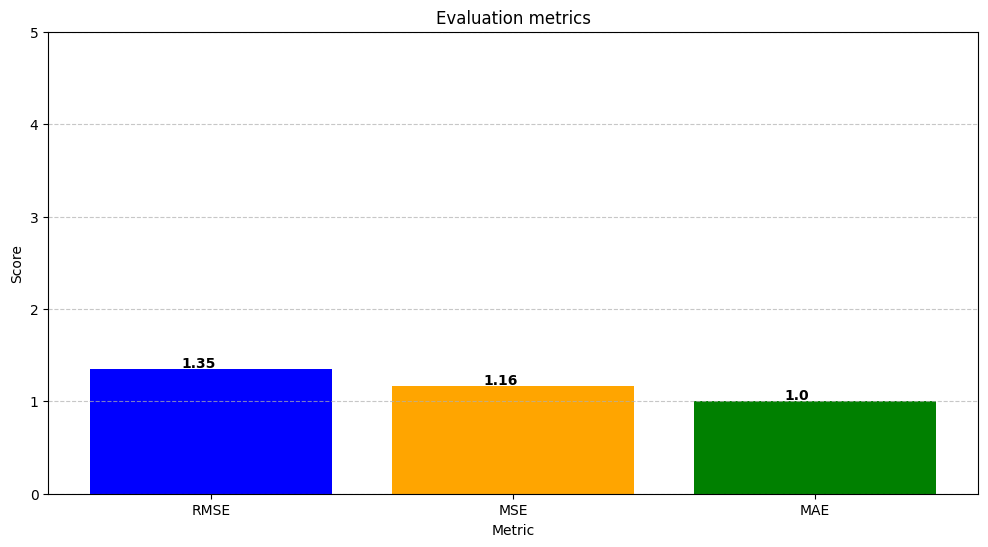

In [40]:
# Plot the metrics rmse, mse and mae
plot_predictions(results, metrics)

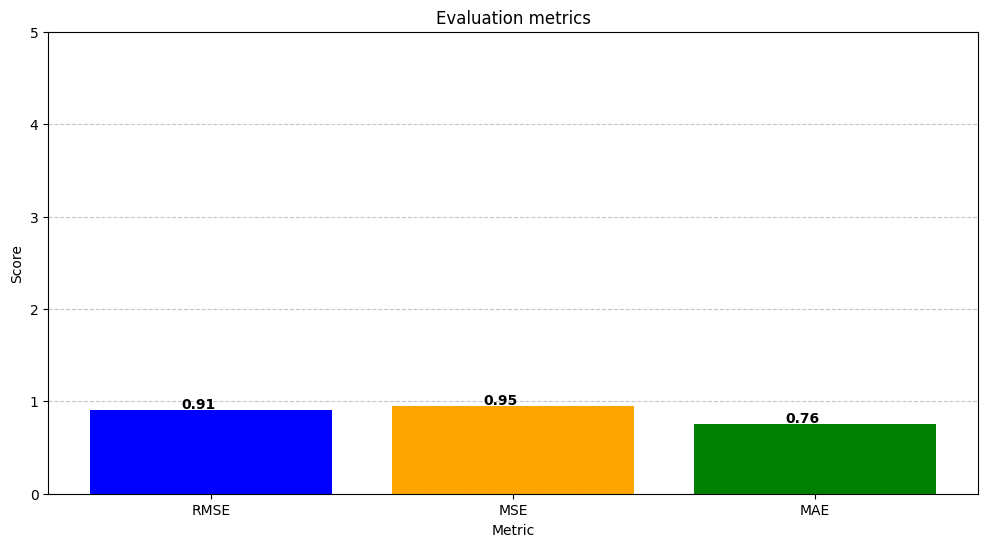

In [41]:
results2 = evaluate_recommender(predictions2)
plot_predictions(results2, metrics)

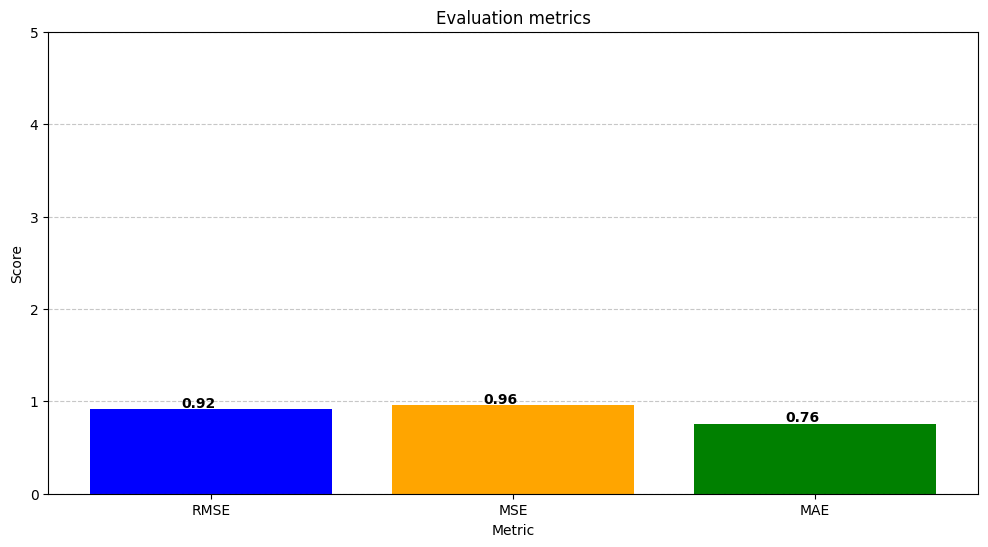

In [42]:
results3 = evaluate_recommender(predictions3)
plot_predictions(results3, metrics)

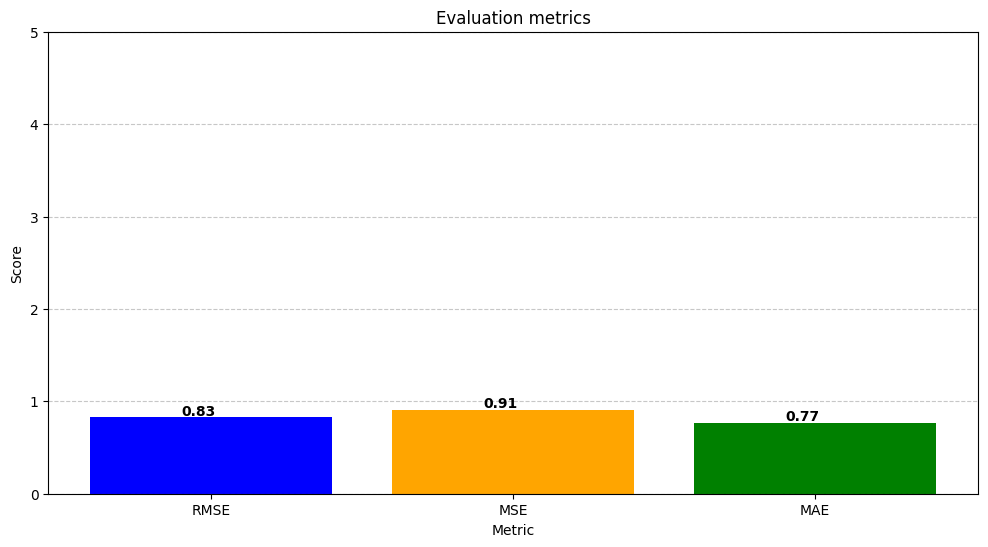

In [43]:
results_baseline = evaluate_recommender(predictions_baseline)
plot_predictions(results_baseline, metrics)

In [44]:
with open("../model/item_based_collaborative_filtering_baseline.pkl", "wb") as f:
    pickle.dump(algo_baseline, f)